In [2]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

    
ratios_comb = pd.read_excel('Reporte_Ratio_Combinado_Por_Aseguradora.xlsx')
ratios_comb

primas_si =pd.read_excel('Reporte_Primas_Y_Siniestros_Por_Categoria.xlsx')

nombre_actual = primas_si.columns[4]
# Cambiar el nombre de la columna en la posición 4
nuevo_nombre = 'Categoria'
primas_si.rename(columns={nombre_actual: nuevo_nombre}, inplace=True)

nombre_actual = primas_si.columns[3]
# Cambiar el nombre de la columna en la posición 3
nuevo_nombre = 'Clasificacion'
primas_si.rename(columns={nombre_actual: nuevo_nombre}, inplace=True)

# Mapear los nombres de los meses en español a números de mes
meses = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Setiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

# Convertir el mes en formato numérico
primas_si['mes_numero'] = primas_si['Mes'].map(meses)

# Crear la columna "fecha" combinando las columnas "año" y "mes_numero"
primas_si['fecha'] = primas_si['Año'].astype(str) + '-' + primas_si['mes_numero']

primas_si

,Año,Mes,Aseguradora,Clasificacion,Categoria,Monto,mes_numero,fecha
0,2015,Enero,INS,Primas,Generales,25017.388756,01,2015-01
1,2015,Enero,INS,Primas,Personales,40829.815988,01,2015-01
2,2015,Enero,INS,Siniestros,Generales,9310.093825,01,2015-01
3,2015,Enero,INS,Siniestros,Personales,11570.439116,01,2015-01
4,2015,Enero,MAGIST,Primas,Personales,70.016074,01,2015-01
...,...,...,...,...,...,...,...,...
3767,2023,Febrero,OCEANICA,Siniestros,Generales,770.607336,02,2023-02
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558,02,2023-02
3769,2023,Febrero,LAFISE,Primas,Personales,4.981774,02,2023-02
3770,2023,Febrero,LAFISE,Siniestros,Generales,615.050863,02,2023-02


In [4]:
#Sacar Sinistralidad de Seguros Personales
primas_siPers = primas_si[primas_si['Categoria']=='Personales']
primas_siPers

primas = primas_siPers[primas_siPers['Clasificacion'] == 'Primas']

# Filtrar las filas correspondientes a siniestros
siniestros = primas_siPers[primas_siPers['Clasificacion'] == 'Siniestros']

# Realizar un merge basado en las columnas 'Año' y 'Mes'
primas_siPers1 = pd.merge(primas, siniestros, on=['Año', 'Mes','Aseguradora','fecha'], suffixes=('_primas', '_siniestros'))

primas_siPers1

# Calcular la relación primas/siniestros para cada año y mes
primas_siPers1['Siniestralidad'] = primas_siPers1['Monto_siniestros'] / primas_siPers1['Monto_primas']
"""
#primas_siPers['Siniestralidad'] = primas_siPers[primas_siPers['Categoria']=='Siniestros'] /  primas_siPers[primas_siPers['Categoria']=='Primas']
primas_siPers = primas_siPers.groupby(['Año', 'Mes']).sum().reset_index()
primas_siPers = pd.DataFrame(primas_siPers)
primas_siPers"""
primas_siPers1

,Año,Mes,Aseguradora,Clasificacion_primas,Categoria_primas,Monto_primas,mes_numero_primas,fecha,Clasificacion_siniestros,Categoria_siniestros,Monto_siniestros,mes_numero_siniestros,Siniestralidad
0,2015,Enero,INS,Primas,Personales,40829.815988,01,2015-01,Siniestros,Personales,11570.439116,01,0.283382
1,2015,Enero,MAGIST,Primas,Personales,70.016074,01,2015-01,Siniestros,Personales,23.699641,01,0.338489
2,2015,Enero,MAPFRE,Primas,Personales,86.214955,01,2015-01,Siniestros,Personales,76.156995,01,0.883339
3,2015,Enero,ASSA,Primas,Personales,207.423777,01,2015-01,Siniestros,Personales,22.995908,01,0.110864
4,2015,Enero,PANAM,Primas,Personales,4199.108539,01,2015-01,Siniestros,Personales,1503.514889,01,0.358056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2023,Febrero,ADISA,Primas,Personales,3610.947410,02,2023-02,Siniestros,Personales,902.868490,02,0.250036
976,2023,Febrero,DAVIVIENDA,Primas,Personales,225.390833,02,2023-02,Siniestros,Personales,108.908250,02,0.483197
977,2023,Febrero,BMI,Primas,Personales,2276.331324,02,2023-02,Siniestros,Personales,1035.989433,02,0.455114
978,2023,Febrero,SAGICOR,Primas,Personales,1719.922057,02,2023-02,Siniestros,Personales,178.723893,02,0.103914


In [5]:
#Sacar Sinistralidad de Seguros Generales
primas_siGen = primas_si[primas_si['Categoria']=='Generales']
primas_siGen

primas = primas_siGen[primas_siGen['Clasificacion'] == 'Primas']

# Filtrar las filas correspondientes a siniestros
siniestros = primas_siGen[primas_siGen['Clasificacion'] == 'Siniestros']

# Realizar un merge basado en las columnas 'Año' y 'Mes'
primas_siGen1 = pd.merge(primas, siniestros, on=['Año', 'Mes','Aseguradora','fecha'], suffixes=('_primas', '_siniestros'))

primas_siGen1

# Calcular la relación primas/siniestros para cada año y mes
primas_siGen1['Siniestralidad'] = primas_siGen1['Monto_siniestros'] / primas_siGen1['Monto_primas']
"""
#primas_siPers['Siniestralidad'] = primas_siPers[primas_siPers['Categoria']=='Siniestros'] /  primas_siPers[primas_siPers['Categoria']=='Primas']
primas_siPers = primas_siPers.groupby(['Año', 'Mes']).sum().reset_index()
primas_siPers = pd.DataFrame(primas_siPers)
primas_siPers"""
primas_siGen1

,Año,Mes,Aseguradora,Clasificacion_primas,Categoria_primas,Monto_primas,mes_numero_primas,fecha,Clasificacion_siniestros,Categoria_siniestros,Monto_siniestros,mes_numero_siniestros,Siniestralidad
0,2015,Enero,INS,Primas,Generales,25017.388756,01,2015-01,Siniestros,Generales,9310.093825,01,0.372145
1,2015,Enero,MAPFRE,Primas,Generales,741.514905,01,2015-01,Siniestros,Generales,159.315819,01,0.214852
2,2015,Enero,ASSA,Primas,Generales,1353.545665,01,2015-01,Siniestros,Generales,270.761315,01,0.200039
3,2015,Enero,ADISA,Primas,Generales,126.897130,01,2015-01,Siniestros,Generales,21.379745,01,0.168481
4,2015,Enero,DAVIVIENDA,Primas,Generales,58.993607,01,2015-01,Siniestros,Generales,2.759387,01,0.046774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2023,Febrero,DAVIVIENDA,Primas,Generales,229.580913,02,2023-02,Siniestros,Generales,92.646464,02,0.403546
901,2023,Febrero,QUALITAS,Primas,Generales,6065.986811,02,2023-02,Siniestros,Generales,2175.205675,02,0.358591
902,2023,Febrero,SAGICOR,Primas,Generales,381.002673,02,2023-02,Siniestros,Generales,188.280948,02,0.494172
903,2023,Febrero,OCEANICA,Primas,Generales,2526.247114,02,2023-02,Siniestros,Generales,770.607336,02,0.305040


/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/196480491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersINS["Siniestralidad%"]=primas_PersINS['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/196480491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersINS['fecha'] = pd.to_datetime(primas_PersINS['fecha'])
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/196480491.py:10: SettingWithCopyWarning: 
A value is try

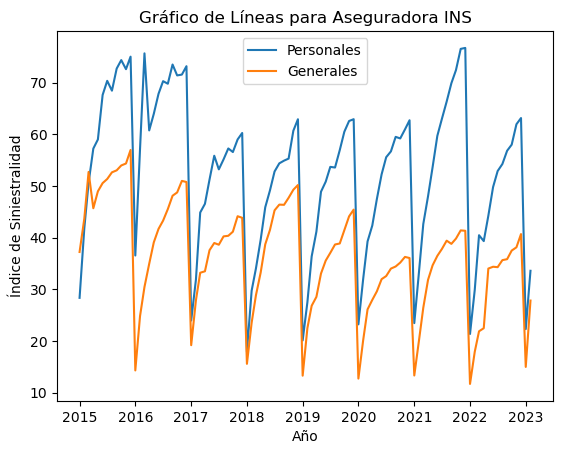

In [6]:


primas_PersINS = primas_siPers1[primas_siPers1['Aseguradora'] == 'INS']
primas_PersINS["Siniestralidad%"]=primas_PersINS['Siniestralidad']*100
primas_PersINS['fecha'] = pd.to_datetime(primas_PersINS['fecha'])
# Sort the dataset by the 'Date' column
primas_PersINS = primas_PersINS.sort_values('fecha')
#primas_PersINS
#primas_PersINS["Siniestralidad%"]=primas_PersINS["Siniestralidad%"]#.round().astype(int)

primas_GenINS = primas_siGen1[primas_siGen1['Aseguradora'] == 'INS']
primas_GenINS["Siniestralidad%"]=primas_GenINS['Siniestralidad']*100
primas_GenINS['fecha'] = pd.to_datetime(primas_GenINS['fecha'])
# Sort the dataset by the 'Date' column
primas_GenINS = primas_GenINS.sort_values('fecha')
#primas_GenINS
#primas_GenINS["Siniestralidad%"]=primas_GenINS["Siniestralidad%"]#.round().astype(int)

# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.plot(primas_PersINS['fecha'], primas_PersINS['Siniestralidad%'], label='Personales')
plt.plot(primas_GenINS['fecha'], primas_GenINS['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora INS')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()

#primas_PersINS

/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/219858809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersASSA["Siniestralidad%"]=primas_PersASSA['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/219858809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersASSA['fecha'] = pd.to_datetime(primas_PersASSA['fecha'])
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/219858809.py:10: SettingWithCopyWarning: 
A value is

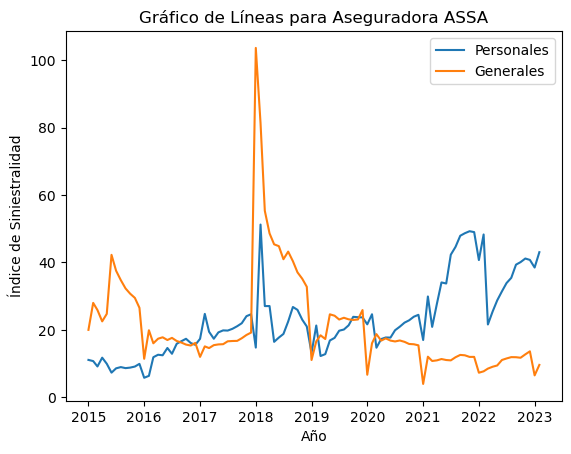

In [7]:
primas_PersASSA = primas_siPers1[primas_siPers1['Aseguradora'] == 'ASSA']
primas_PersASSA["Siniestralidad%"]=primas_PersASSA['Siniestralidad']*100
primas_PersASSA['fecha'] = pd.to_datetime(primas_PersASSA['fecha'])
# Sort the dataset by the 'Date' column
primas_PersASSA = primas_PersASSA.sort_values('fecha')
#primas_PersINS
#primas_PersINS["Siniestralidad%"]=primas_PersINS["Siniestralidad%"]#.round().astype(int)

primas_GenASSA = primas_siGen1[primas_siGen1['Aseguradora'] == 'ASSA']
primas_GenASSA["Siniestralidad%"]=primas_GenASSA['Siniestralidad']*100
primas_GenASSA['fecha'] = pd.to_datetime(primas_GenASSA['fecha'])
# Sort the dataset by the 'Date' column
primas_GenASSA = primas_GenASSA.sort_values('fecha')
#primas_GenINS
#primas_GenINS["Siniestralidad%"]=primas_GenINS["Siniestralidad%"]#.round().astype(int)

# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.plot(primas_PersASSA['fecha'], primas_PersASSA['Siniestralidad%'], label='Personales')
plt.plot(primas_GenASSA['fecha'], primas_GenASSA['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora ASSA')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()

#primas_PersASSA

/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/1223487235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersPANAM["Siniestralidad%"]=primas_PersPANAM['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/1223487235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersPANAM['fecha'] = pd.to_datetime(primas_PersPANAM['fecha'])


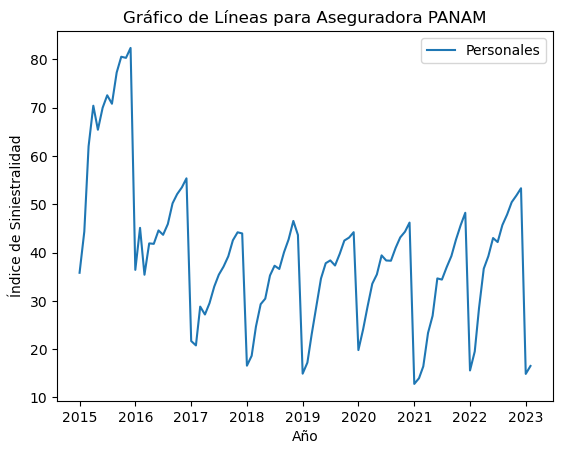

In [20]:
primas_PersPANAM = primas_siPers1[primas_siPers1['Aseguradora'] == 'PANAM']
primas_PersPANAM["Siniestralidad%"]=primas_PersPANAM['Siniestralidad']*100
primas_PersPANAM['fecha'] = pd.to_datetime(primas_PersPANAM['fecha'])
# Sort the dataset by the 'Date' column
primas_PersPANAM = primas_PersPANAM.sort_values('fecha')
#primas_PersINS
#primas_PersINS["Siniestralidad%"]=primas_PersINS["Siniestralidad%"]#.round().astype(int)
"""
primas_GenPANAM = primas_siGen1[primas_siGen1['Aseguradora'] == 'PANAM']
primas_GenPANAM["Siniestralidad%"]=primas_GenPANAM['Siniestralidad']*100
primas_GenPANAM['fecha'] = pd.to_datetime(primas_GenPANAM['fecha'])
# Sort the dataset by the 'Date' column
primas_GenPANAM = primas_GenPANAM.sort_values('fecha')
#primas_GenINS
#primas_GenINS["Siniestralidad%"]=primas_GenINS["Siniestralidad%"]#.round().astype(int)
"""
# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='Personales')
#plt.plot(primas_GenPANAM['fecha'], primas_GenPANAM['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora PANAM')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()



/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/3282676396.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_GenQUALITAS["Siniestralidad%"]=primas_GenQUALITAS['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/3282676396.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_GenQUALITAS['fecha'] = pd.to_datetime(primas_GenQUALITAS['fecha'])


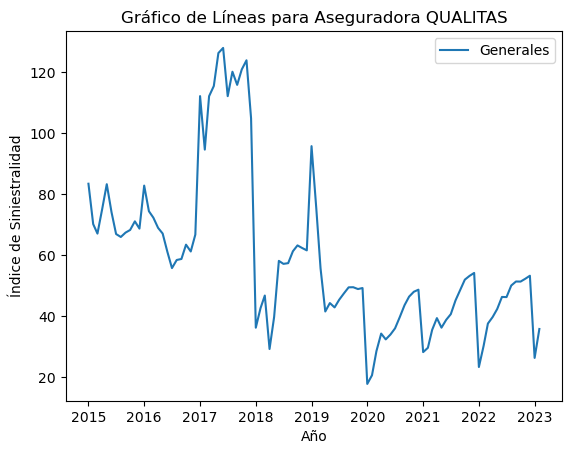

In [21]:
"""
primas_PersQUALITAS = primas_siPers1[primas_siPers1['Aseguradora'] == 'PANAM']
primas_PersQUALITAS["Siniestralidad%"]=primas_PersQUALITAS['Siniestralidad']*100
primas_PersQUALITAS['fecha'] = pd.to_datetime(primas_PersQUALITAS['fecha'])
# Sort the dataset by the 'Date' column
primas_PersQUALITAS = primas_PersQUALITAS.sort_values('fecha')
#primas_PersINS
#primas_PersINS["Siniestralidad%"]=primas_PersINS["Siniestralidad%"]#.round().astype(int)
"""
primas_GenQUALITAS = primas_siGen1[primas_siGen1['Aseguradora'] == 'QUALITAS']
primas_GenQUALITAS["Siniestralidad%"]=primas_GenQUALITAS['Siniestralidad']*100
primas_GenQUALITAS['fecha'] = pd.to_datetime(primas_GenQUALITAS['fecha'])
# Sort the dataset by the 'Date' column
primas_GenQUALITAS = primas_GenQUALITAS.sort_values('fecha')
#primas_GenINS
#primas_GenINS["Siniestralidad%"]=primas_GenINS["Siniestralidad%"]#.round().astype(int)

# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
#plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='Personales')
plt.plot(primas_GenQUALITAS['fecha'], primas_GenQUALITAS['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora QUALITAS')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()



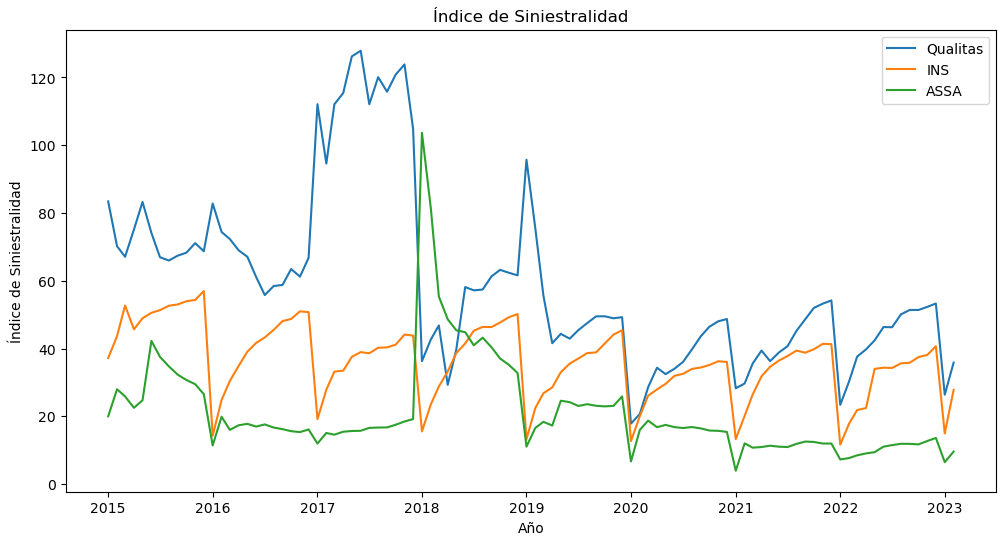

In [26]:
# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
#plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='Personales')
plt.figure(figsize=(12, 6))
plt.plot(primas_GenQUALITAS['fecha'], primas_GenQUALITAS['Siniestralidad%'], label='Qualitas')
plt.plot(primas_GenINS['fecha'], primas_GenINS['Siniestralidad%'], label='INS')
plt.plot(primas_GenASSA['fecha'], primas_GenASSA['Siniestralidad%'], label='ASSA')

# Personalizar el gráfico
plt.title('Índice de Siniestralidad')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()


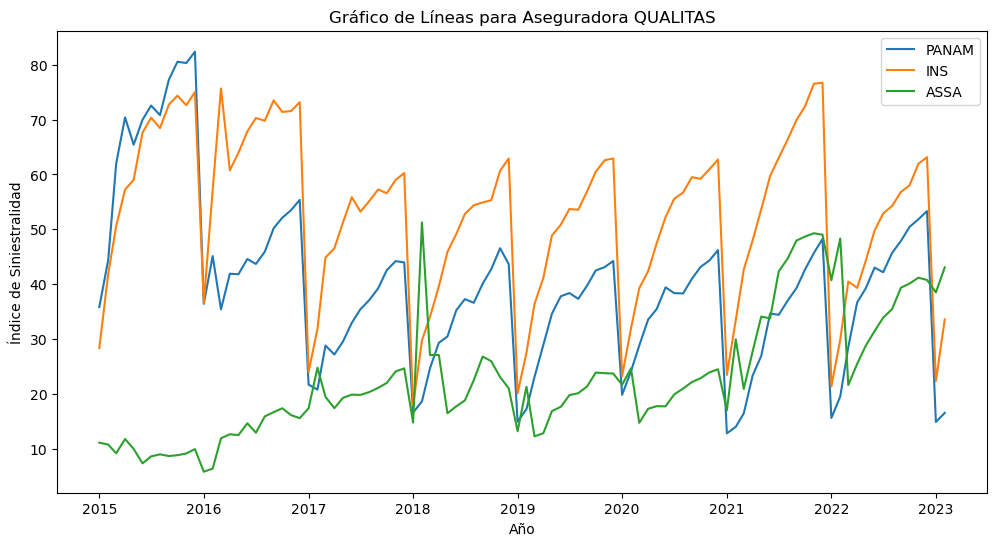

In [25]:
# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
#plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='Personales')
plt.figure(figsize=(12, 6))
plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='PANAM')
plt.plot(primas_PersINS['fecha'], primas_PersINS['Siniestralidad%'], label='INS')
plt.plot(primas_PersASSA['fecha'], primas_PersASSA['Siniestralidad%'], label='ASSA')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora QUALITAS')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()

/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/796584081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersPANAM["Siniestralidad%"]=primas_PersPANAM['Siniestralidad']*100
/var/folders/4t/cs6gdfwn7jj7hmdvrg38cw3w0000gn/T/ipykernel_11619/796584081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primas_PersPANAM['fecha'] = pd.to_datetime(primas_PersPANAM['fecha'])


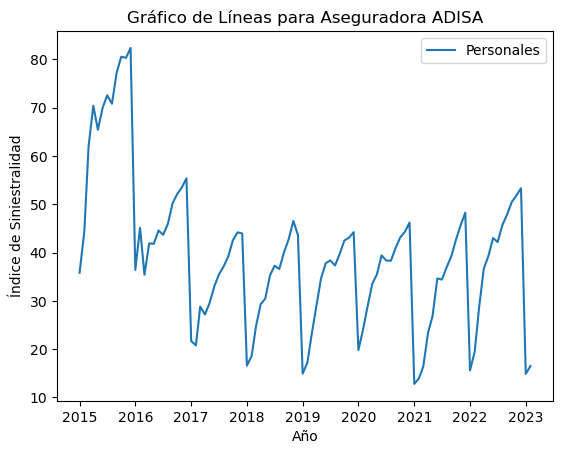

In [17]:
primas_PersPANAM = primas_siPers1[primas_siPers1['Aseguradora'] == 'PANAM']
primas_PersPANAM["Siniestralidad%"]=primas_PersPANAM['Siniestralidad']*100
primas_PersPANAM['fecha'] = pd.to_datetime(primas_PersPANAM['fecha'])
# Sort the dataset by the 'Date' column
primas_PersPANAM = primas_PersPANAM.sort_values('fecha')
#primas_PersINS
#primas_PersINS["Siniestralidad%"]=primas_PersINS["Siniestralidad%"]#.round().astype(int)
"""
primas_GenPANAM = primas_siGen1[primas_siGen1['Aseguradora'] == 'PANAM']
primas_GenPANAM["Siniestralidad%"]=primas_GenPANAM['Siniestralidad']*100
primas_GenPANAM['fecha'] = pd.to_datetime(primas_GenPANAM['fecha'])
# Sort the dataset by the 'Date' column
primas_GenPANAM = primas_GenPANAM.sort_values('fecha')
#primas_GenINS
#primas_GenINS["Siniestralidad%"]=primas_GenINS["Siniestralidad%"]#.round().astype(int)
"""
# Crear el gráfico de líneas con dos líneas correspondientes a los dataframes filtrados
plt.plot(primas_PersPANAM['fecha'], primas_PersPANAM['Siniestralidad%'], label='Personales')
#plt.plot(primas_GenPANAM['fecha'], primas_GenPANAM['Siniestralidad%'], label='Generales')

# Personalizar el gráfico
plt.title('Gráfico de Líneas para Aseguradora PANAM')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()
# Mostrar el gráfico
plt.show()



In [85]:
ratios_comb

,Periodo,Aseguradora,Índice de siniestralidad,Índice de gastos,Gastos de adquisición,Gastos de administración,Comisiones y participaciones en el reaseguro cedido y retrocedido (-),Otros gastos netos,Ratio combinado
0,I-2017,INS,73.595578,25.260555,14.730628,4.558884,2.824905,8.795949,98.856133
1,I-2017,MAGIST,68.520522,28.543753,6.301374,16.973535,0.000000,5.268844,97.064275
2,I-2017,MAPFRE,45.482357,53.456384,58.657900,38.213424,57.093594,13.678653,98.938741
3,I-2017,ASSA,35.807771,38.822979,29.687974,24.804246,31.499479,15.830237,74.630750
4,I-2017,PANAM,54.284405,26.136128,17.151031,16.227230,8.730487,1.488354,80.420533
...,...,...,...,...,...,...,...,...,...
317,I-2023,QUALITAS,63.866845,19.982534,22.826305,1.832913,0.048559,-4.628125,83.849379
318,I-2023,BMI,51.598697,33.629641,24.455319,16.792309,7.191276,-0.426711,85.228338
319,I-2023,SAGICOR,17.935086,43.670583,17.950071,0.523883,0.068394,25.265023,61.605669
320,I-2023,OCEANICA,57.206933,43.828208,36.368221,10.400531,18.707472,15.766928,101.035141


In [9]:

def convertir_trimestre_a_fecha(trimestre):
    trimestre= trimestre.replace('I','1')
    trimestre_numero = int(trimestre.split('-')[0].replace('1V','10').replace('111', '7').replace('11','4'))
    anio = int(trimestre.split('-')[1])
    fecha = datetime(anio,trimestre_numero,1)
    return fecha

ratios_comb['Fecha'] = ratios_comb['Periodo'].apply(convertir_trimestre_a_fecha)
ratios_comb



,Periodo,Aseguradora,Índice de siniestralidad,Índice de gastos,Gastos de adquisición,Gastos de administración,Comisiones y participaciones en el reaseguro cedido y retrocedido (-),Otros gastos netos,Ratio combinado,Fecha
0,I-2017,INS,73.595578,25.260555,14.730628,4.558884,2.824905,8.795949,98.856133,2017-01-01
1,I-2017,MAGIST,68.520522,28.543753,6.301374,16.973535,0.000000,5.268844,97.064275,2017-01-01
2,I-2017,MAPFRE,45.482357,53.456384,58.657900,38.213424,57.093594,13.678653,98.938741,2017-01-01
3,I-2017,ASSA,35.807771,38.822979,29.687974,24.804246,31.499479,15.830237,74.630750,2017-01-01
4,I-2017,PANAM,54.284405,26.136128,17.151031,16.227230,8.730487,1.488354,80.420533,2017-01-01
...,...,...,...,...,...,...,...,...,...,...
317,I-2023,QUALITAS,63.866845,19.982534,22.826305,1.832913,0.048559,-4.628125,83.849379,2023-01-01
318,I-2023,BMI,51.598697,33.629641,24.455319,16.792309,7.191276,-0.426711,85.228338,2023-01-01
319,I-2023,SAGICOR,17.935086,43.670583,17.950071,0.523883,0.068394,25.265023,61.605669,2023-01-01
320,I-2023,OCEANICA,57.206933,43.828208,36.368221,10.400531,18.707472,15.766928,101.035141,2023-01-01


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


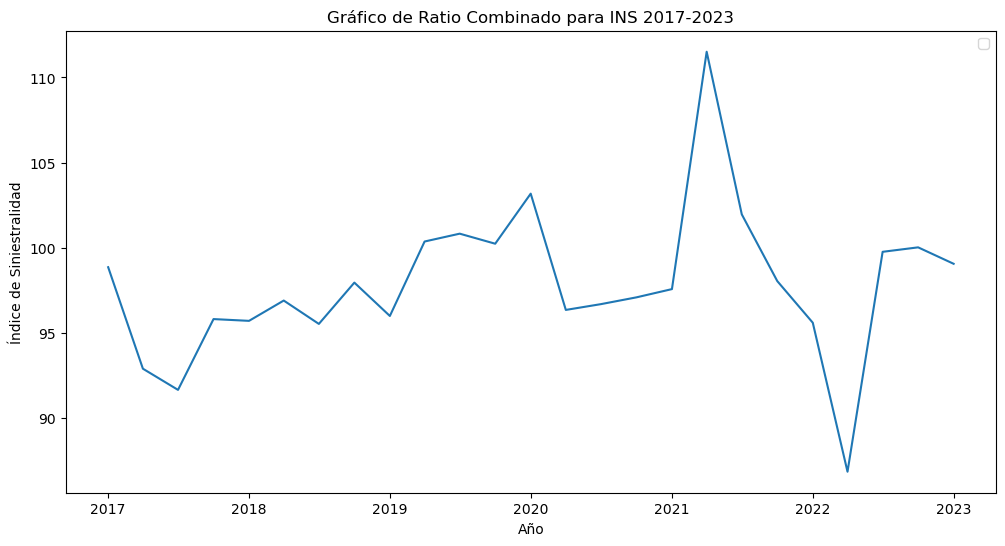

In [10]:
ratios_INS=ratios_comb[ratios_comb['Aseguradora']=='INS']

plt.figure(figsize=(12, 6))
plt.plot(ratios_INS['Fecha'], ratios_INS['Ratio combinado'])

# Personalizar el gráfico
plt.title('Gráfico de Ratio Combinado para INS 2017-2023')
plt.xlabel('Año')
plt.ylabel('Índice de Siniestralidad')
plt.legend()


# Mostrar el gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


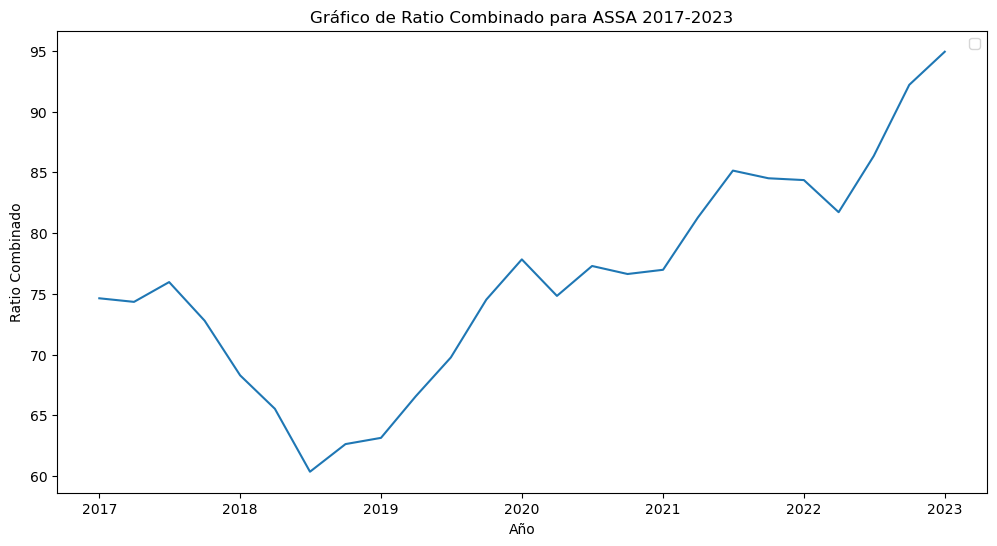

In [11]:
ratios_ASSA=ratios_comb[ratios_comb['Aseguradora']=='ASSA']

plt.figure(figsize=(12, 6))
plt.plot(ratios_ASSA['Fecha'], ratios_ASSA['Ratio combinado'])

# Personalizar el gráfico
plt.title('Gráfico de Ratio Combinado para ASSA 2017-2023')
plt.xlabel('Año')
plt.ylabel('Ratio Combinado')
plt.legend()


# Mostrar el gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


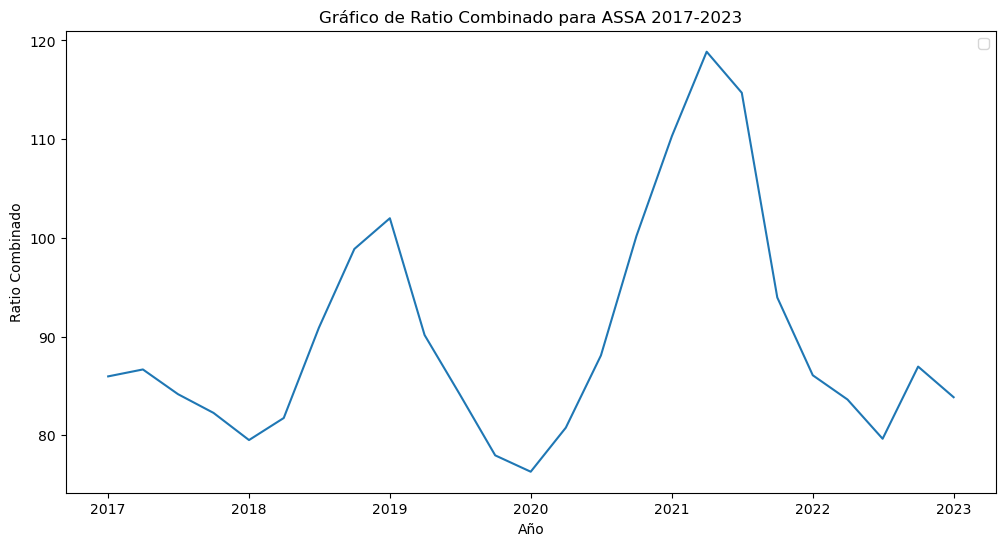

In [12]:
ratios_QUALITAS=ratios_comb[ratios_comb['Aseguradora']=='QUALITAS']

plt.figure(figsize=(12, 6))
plt.plot(ratios_QUALITAS['Fecha'], ratios_QUALITAS['Ratio combinado'])

# Personalizar el gráfico
plt.title('Gráfico de Ratio Combinado para ASSA 2017-2023')
plt.xlabel('Año')
plt.ylabel('Ratio Combinado')
plt.legend()


# Mostrar el gráfico
plt.show()

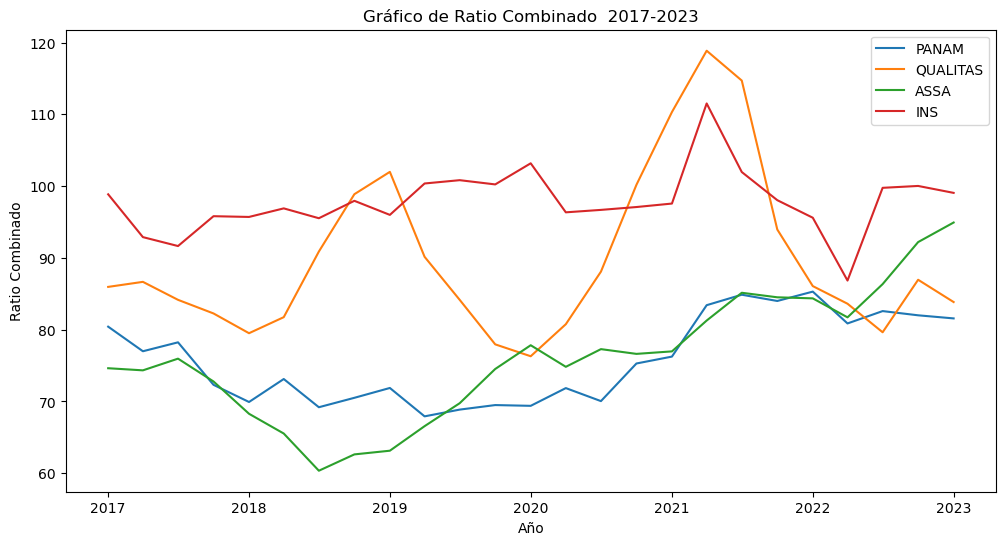

In [14]:
ratios_PANAM=ratios_comb[ratios_comb['Aseguradora']=='PANAM']

plt.figure(figsize=(12, 6))
plt.plot(ratios_PANAM['Fecha'], ratios_PANAM['Ratio combinado'], label='PANAM')
plt.plot(ratios_QUALITAS['Fecha'], ratios_QUALITAS['Ratio combinado'], label='QUALITAS')
plt.plot(ratios_ASSA['Fecha'], ratios_ASSA['Ratio combinado'],label='ASSA')
plt.plot(ratios_INS['Fecha'], ratios_INS['Ratio combinado'], label='INS')

# Personalizar el gráfico
plt.title('Gráfico de Ratio Combinado  2017-2023')
plt.xlabel('Año')
plt.ylabel('Ratio Combinado')
plt.legend()


# Mostrar el gráfico
plt.show()